# Home Alarm CLV

Prepare "Home Alarm, Inc.: Assessing Customer Lifetime Value" for class discussion and as an individual assignment and submit the assignment through GitLab. Be VERY clear about where results are coming from and what assumptions you are making in your Python code. It is in your best interest that we do not have to struggle to figure out where your numbers came from. The assignment (pdf) is on Canvas (week2/homealarm-clv.pdf). Example Excel calculations are also on Canvas (week1/aws-clv.xlsx and week1/notflix-cls.xlsx).

## Setup

Create a Jupyter notebook in which you calculate the CLV for a customer that uses auto-pay and for a customer that does not use auto-pay and answer question 1 through 4 in the assignment PDF.

## Hints

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

Please generate an HTML (Notebook) with your answers to all the questions listed in the homealarm-clv.pdf file on Canvas. When you have finished editing the jupyter notebook and havengenerated the HTML report make sure to save, commit, and push to GitLab. We will collect all files from GitLab after the due date.

Use File > Export Notebook As... > Export Notebook to HTML to get the html report and include to the jupyter notebook file and the HTML file in your submission.

## Analysis

The python dictionary below contains information about attrition notifications from the table on page 3 of the assignment PDF.

Note: GitLab will automatically tests if your work is fully reproducible each time you "push" changes (see .gitlab-ci.yml for the configuration). If you get an email from GitLab stating that there was an error, it suggests a problem in your code. Note that the setup for the Home Alarm assignment will *not* test if your analysis is correct. GitLab will only check if the code is valid and runs without issue in the docker container.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
churn = pd.DataFrame(
    {
        "autopay": [0.032, 0.070, 0.097, 0.103, 0.095, 0.078, 0.069, 0.059, 0.053],
        "no_autopay": [0.084, 0.122, 0.162, 0.154, 0.134, 0.120, 0.111, 0.096, 0.086],
    }
)

### Calculate CLV for autopay customers

- This CLV calculation is for Year2 to Year9 since existing residential customers who are about to start their 2nd year with Home
-  The churn rate of Year2 is zero, which means the retention rate of Year2 is 100%
- the revenue paid by customers monthly
-  Retention of one year is related to the churn rate of last year
- Since we consider "existing" residential customers, we ignore installation cost

In [6]:
monthly_discount_rate =(1+0.1)**(1/12)-1
general_rate_increases = 0.03 
Y1_rev = 40
Y1_serco = 6
Y1_marco = 2
#revenue list
revenue_ele = [Y1_rev*((1+general_rate_increases)**i) for i in range(8)]
revenue =  [val for val in revenue_ele for i in range(12)]
service_cost_ele = [Y1_serco*(1+general_rate_increases)**i for i in range(8)]
service_cost = [val for val in service_cost_ele for i in range(12)]
market_cost_ele = [Y1_marco*(1+general_rate_increases)**i for i in range(8)]
market_cost = [val for val in market_cost_ele for i in range(12)]
discount = [i+1 for i in range(12*8)]
autopay_churn=list(churn['autopay'][:-1])
autopay_churn[0]=0
prob_of_act_end=[1]
for i in range(8):
    prob_of_act_end.append(prob_of_act_end[i]*(1-autopay_churn[i]))
prob_of_act_end = prob_of_act_end[1:]
autopay_churn = [val for val in autopay_churn for i in range(12)]
prob_of_act_end = [val for val in prob_of_act_end for i in range(12)]
autopay = pd.DataFrame(
    {
        "Revenues":revenue,
        "service_cost": service_cost,
        "market_cost": market_cost,
        "churn_rate": autopay_churn,
        "discount": discount,
        "prob_of_act_end": prob_of_act_end
    }
)
autopay['customer_profits'] = autopay['Revenues']-autopay['service_cost']-autopay['market_cost']
autopay['expected_profit'] = autopay['customer_profits']*autopay['prob_of_act_end']
autopay['pv_expected_profit'] = autopay['expected_profit']/(1+monthly_discount_rate)**autopay['discount']
autopay['clv'] = autopay['pv_expected_profit']

for i in range(len(autopay['clv'])):
    if i != 0:
        autopay['clv'][i]=autopay['clv'][i-1]+autopay['clv'][i]

<ipython-input-6-02b2f7f6a10b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autopay['clv'][i]=autopay['clv'][i-1]+autopay['clv'][i]


In [8]:
print("autopay_clv:",list(autopay['clv'])[-1])

autopay_clv: 1803.6602006114986


### Calculate CLV for non-autopay customers

- This CLV calculation is for Year2 to Year9 since existing residential customers who are about to start their 2nd year with Home
-  The churn rate of Year2 is zero, which means the retention rate of Year2 is 100%
- the revenue paid by customers monthly
-  Retention of one year is related to the churn rate of last year
- Since we consider "existing" residential customers, we ignore installation cost

In [9]:
monthly_discount_rate =(1+0.1)**(1/12)-1
general_rate_increases = 0.03 
Y1_rev = 40
Y1_serco = 6
Y1_marco = 2
#revenue list
revenue_ele = [Y1_rev*((1+general_rate_increases)**i) for i in range(8)]
revenue =  [val for val in revenue_ele for i in range(12)]
service_cost_ele = [Y1_serco*(1+general_rate_increases)**i for i in range(8)]
service_cost = [val for val in service_cost_ele for i in range(12)]
market_cost_ele = [Y1_marco*(1+general_rate_increases)**i for i in range(8)]
market_cost = [val for val in market_cost_ele for i in range(12)]
discount = [i+1 for i in range(12*8)]
no_autopay_churn=list(churn['no_autopay'][:-1])
no_autopay_churn[0]=0
prob_of_act_end=[1]
for i in range(8):
    prob_of_act_end.append(prob_of_act_end[i]*(1-no_autopay_churn[i]))
prob_of_act_end = prob_of_act_end[1:]
no_autopay_churn = [val for val in no_autopay_churn for i in range(12)]
prob_of_act_end = [val for val in prob_of_act_end for i in range(12)]
no_autopay = pd.DataFrame(
    {
        "Revenues":revenue,
        "service_cost": service_cost,
        "market_cost": market_cost,
        "churn_rate": no_autopay_churn,
        "discount": discount,
        "prob_of_act_end": prob_of_act_end
    }
)
no_autopay['customer_profits'] = no_autopay['Revenues']-no_autopay['service_cost']-no_autopay['market_cost']
no_autopay['expected_profit'] = no_autopay['customer_profits']*no_autopay['prob_of_act_end']
no_autopay['pv_expected_profit'] = no_autopay['expected_profit']/(1+monthly_discount_rate)**no_autopay['discount']
no_autopay['clv'] = no_autopay['pv_expected_profit']

for i in range(len(no_autopay['clv'])):
    if i != 0:
        no_autopay['clv'][i]=no_autopay['clv'][i-1]+no_autopay['clv'][i]

<ipython-input-9-6db9135a1725>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_autopay['clv'][i]=no_autopay['clv'][i-1]+no_autopay['clv'][i]


In [10]:
print("no_autopay_clv:",list(no_autopay['clv'])[-1])

no_autopay_clv: 1553.7229332501743


### Create a line graph of CLV for both autopay and non-autopay customer 

Text(0, 0.5, 'CLV')

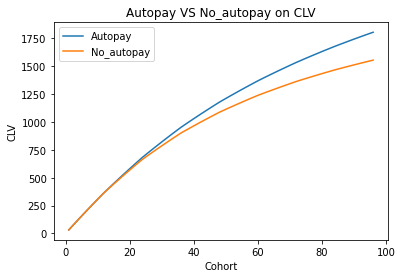

In [11]:
cohort = [i+1 for i in range(96)]
auto_pay_clv = autopay['clv']
no_auto_pay_clv = no_autopay['clv']
clv_diff = pd.DataFrame(
    {
        "Cohort": cohort,
        "auto_pay_clv": auto_pay_clv,
        "no_auto_pay_clv": no_auto_pay_clv,

    }
)
clv_diff.set_index('Cohort')
sns.lineplot(data=clv_diff,x='Cohort',y='auto_pay_clv',label="Autopay")
sns.lineplot(data=clv_diff,x='Cohort',y='no_auto_pay_clv',label = "No_autopay")
plt.title("Autopay VS No_autopay on CLV")
plt.ylabel("CLV")

### Create a line graph of the retention rate for both autopay and non-autopay customer 

Text(0, 0.5, 'Retention_rate')

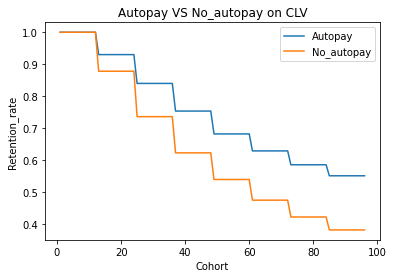

In [12]:
cohort = [i+1 for i in range(96)]
auto_pay_ren = autopay['prob_of_act_end']
no_auto_pay_ren = no_autopay['prob_of_act_end']
ren_diff = pd.DataFrame(
    {
        "Cohort": cohort,
        "auto_pay_ren": auto_pay_ren,
        "no_auto_pay_ren": no_auto_pay_ren,

    }
)
ren_diff.set_index('Cohort')
sns.lineplot(data=ren_diff,x='Cohort',y='auto_pay_ren',label="Autopay")
sns.lineplot(data=ren_diff,x='Cohort',y='no_auto_pay_ren',label = "No_autopay")
plt.title("Autopay VS No_autopay on CLV")
plt.ylabel("Retention_rate")

### Calculate the maximum amount to spend on autopay incentives

In [13]:
max_pay = auto_pay_clv[len(auto_pay_clv)-1]-no_auto_pay_clv[len(no_auto_pay_clv)-1]
print(f"Maxium amount to spend on autopay incentives is {max_pay.round(2)}")

Maxium amount to spend on autopay incentives is 249.94


### Suggested marketing actions

Suggest three marketing actions Home Alarm should consider to convert existing customers to autopay who are about to start their second year with Home Alarm. Be specific about incentive amounts you recommend using (if any)

- Use gifts or discounts to induce users to renew autopay contracts for an one-year or even longer contract. For example, when users are thinking about renewing the Year3 contract, they can be attracted by a discount of nor more than 17.76 dollars; when users are thinking about renewing the Year4 contract as well, they can get a discount of no more than 51.03 dollars. Or the company can give customers gifts of equal value.

In [14]:
clv_diff['diff']=clv_diff['auto_pay_clv']-clv_diff['no_auto_pay_clv']
Y3_diff = clv_diff['diff'][23]
Y4_diff = clv_diff['diff'][35]
Y5_diff = clv_diff['diff'][47]
Y6_diff = clv_diff['diff'][59]
Y7_diff = clv_diff['diff'][71]
Y8_diff = clv_diff['diff'][83]
Y9_diff = clv_diff['diff'][95]
Y3_9_diff = [Y3_diff,Y4_diff,Y5_diff,Y6_diff,Y7_diff,Y8_diff,Y9_diff]
print(Y3_9_diff)

[17.7632037276785, 51.037156208530746, 90.22324519203812, 130.23797991202855, 170.72907004052013, 210.92627125747458, 249.9372673613243]


- Discounted prices throughout the year. For example, if the autopay contract is renewed, users throughout the year can enjoy a 3% discount on monthly payments

In [15]:
Y3_discount = (revenue_ele[1]*12-Y3_diff)/(revenue_ele[1]*12)
Y4_discount = (revenue_ele[2]*12-Y3_diff)/(revenue_ele[2]*12)
Y5_discount = (revenue_ele[3]*12-Y3_diff)/(revenue_ele[3]*12)
Y6_discount = (revenue_ele[4]*12-Y3_diff)/(revenue_ele[4]*12)
Y7_discount = (revenue_ele[5]*12-Y3_diff)/(revenue_ele[5]*12)
Y8_discount = (revenue_ele[6]*12-Y3_diff)/(revenue_ele[6]*12)
Y9_discount = (revenue_ele[7]*12-Y3_diff)/(revenue_ele[7]*12)
Y3_9_discount = [Y3_discount,Y4_discount,Y5_discount,Y6_discount,Y7_discount,Y8_discount,Y9_discount]
print(Y3_9_discount)

[0.9640711898712004, 0.9651176600691267, 0.9661336505525502, 0.9671200490801458, 0.9680777175535396, 0.9690074927704267, 0.9699101871557542]


- Use cash back incentives. For example, if customer choose to renews autopay contract for Year3, the customer will receive a refund of 1.48 dollars in cash after each payment. For Year4, the customer will receive a refund of 2.77 per month...

In [16]:
Y3_diff_y = clv_diff['diff'][23]-clv_diff['diff'][11]
Y4_diff_y = clv_diff['diff'][35]-clv_diff['diff'][23]
Y5_diff_y = clv_diff['diff'][47]-clv_diff['diff'][35]
Y6_diff_y = clv_diff['diff'][59]-clv_diff['diff'][47]
Y7_diff_y = clv_diff['diff'][71]-clv_diff['diff'][59]
Y8_diff_y = clv_diff['diff'][83]-clv_diff['diff'][71]
Y9_diff_y = clv_diff['diff'][95]-clv_diff['diff'][83]

Y3_9_diff_y = [Y3_diff_y,Y4_diff_y,Y5_diff_y,Y6_diff_y,Y7_diff_y,Y8_diff_y,Y9_diff_y]
Y3_9_diff_y = np.array(Y3_9_diff_y)/12
print(Y3_9_diff_y)

[1.48026698 2.77282937 3.26550742 3.33456123 3.37425751 3.34976677
 3.25091634]
